In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
model = tf.keras.models.load_model('./model/object_detection.h5')
print('Model loaded Sucessfully')



Model loaded Sucessfully


In [5]:
path = './test/KA25.jpg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # Convert into array and get the normalized output

# Size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 546
Width of the image = 271


<function matplotlib.pyplot.show(close=None, block=None)>

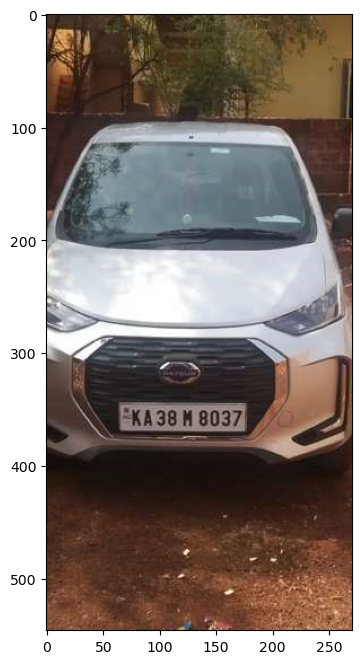

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
# Make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 7s 7s/step


array([[0.33926347, 0.57808965, 0.5949947 , 0.68883824]], dtype=float32)

In [10]:
# Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[ 91.94040009, 156.66229635, 324.86711919, 376.10568094]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[ 91, 156, 324, 376]])

In [12]:
# Draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)

(91, 324) (156, 376)


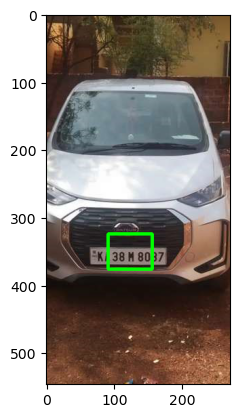

In [13]:
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.imshow(image)
plt.show()

In [14]:
path = './test/test7.png'
def object_detection(path):
    
    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    # Make predictions
    coords = model.predict(test_arr)
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords


1/1 [==============================] - 0s 285ms/step
(223, 183) (332, 218)


<function matplotlib.pyplot.show(close=None, block=None)>

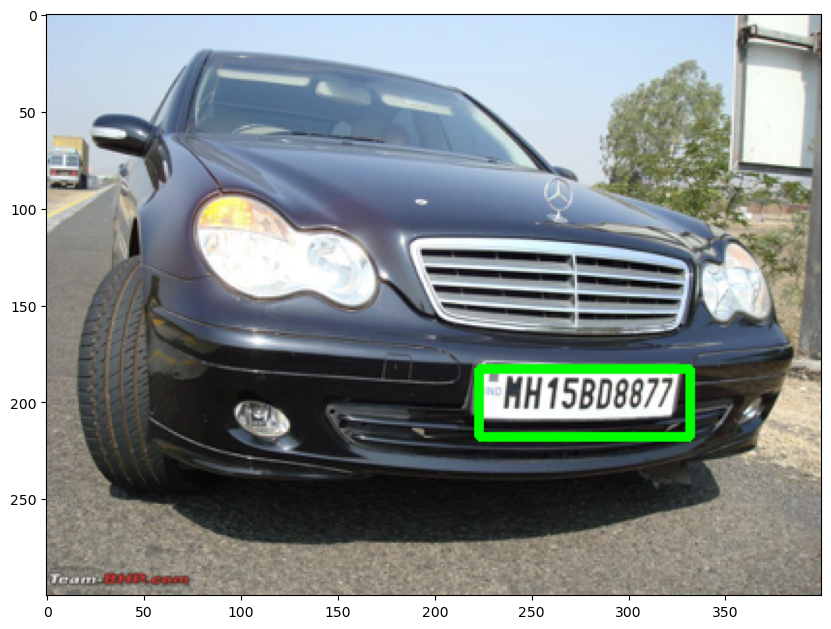

In [15]:
path = './test/test7.png'
image, cods = object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show

In [16]:
#optical character recoginition

In [17]:
import pytesseract as pt

1/1 [==============================] - 0s 248ms/step
(223, 183) (332, 218)


<function matplotlib.pyplot.show(close=None, block=None)>

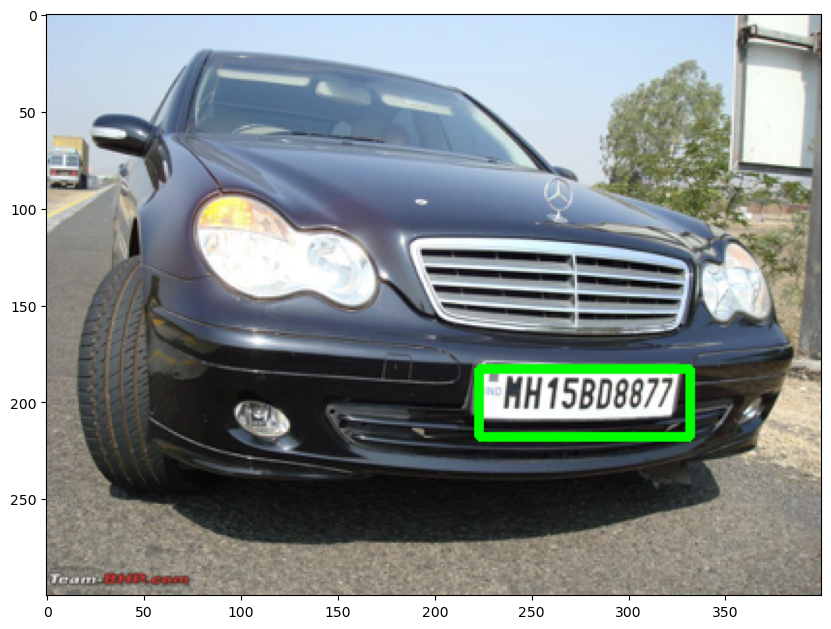

In [18]:
path = './test/test7.png'
image, cods = object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show

In [19]:
cods[0]

array([223, 332, 183, 218])

In [20]:
img = np.array(load_img(path))
xmin, xmax, ymin, ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

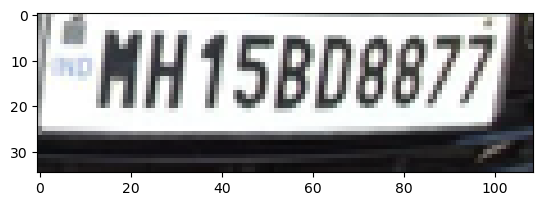

In [21]:
plt.imshow(roi)
plt.show()

In [22]:
#extract text from image
text = pt.image_to_string(roi)
print(text)